# Tony Ngo

## Refined Research question/interests:
How does the relationship between xG and actual goals differ for winning and losing teams?

Is there a correlation between a team's SPI (Soccer Power Index) and their xG?

**Previous research question**

How does expected goals (xG) impact a team's chance of winning a match in the World Cup?


**Other potential ideas that will support further and more in-depth research analysis:**

Is there a correlation between the number of expected goals (xG) a team has and their success in the tournament?
How do differences in expected goals (xG) between opposing teams affect the outcome of a match in the World Cup?
Can teams with lower expected goals (xG) still perform well and win matches in the World Cup?
How do individual player statistics, such as shots on target and assists, relate to a team's expected goals (xG) and success in the World Cup?


**Explain how you plan to answer your research question with your dataset, and a rough analysis plan**

To answer the research question of how expected goals (xG) impact a team's chance of winning a match in the World Cup, I would first need to merge the two datasets together using a common key such as match_id. Once the datasets are merged, I would explore the data to identify any relationships or correlations between xG and the likelihood of winning a match.

Possible columns that could be useful in answering this research question include:

match_id: to join the two datasets together

team: to identify the teams involved in each match

xG, sim_goal_diff: to measure the expected goals for each team in each match

goals: to measure the actual goals scored by each team in each match

outcome: to identify the winning team or losing team, which is important as teams get knocked out or advance as the tournament progressed

odds (sim_wins and sim_losses): to measure the pre-match odds or forecasts for each team to win the match

A rough analysis plan could involve calculating the difference between the xG and actual goals scored for each team in each match and examining the relationship between this difference and the outcome of the match. I could also compare the pre-match odds or forecasts with the actual outcome of the match and explore any relationship with xG. Other possible analyses could involve grouping the data by team or by stage of the tournament to identify any patterns or trends in xG and its impact on winning matches.

In [ ]:
import pandas as pd

df=pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv")
df_use=df[['team1','team2','spi1','spi2','score1','score2','xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2']]
df=pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_forecasts.csv")
df_use=df[['team','spi','global_o','global_d','sim_wins','sim_ties','sim_losses','sim_goal_diff','goals_scored','goals_against','group_1','group_2','group_3','group_4','make_round_of_16','make_quarters','make_semis','make_final','win_league']]

df_use.head(9)

,team,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,goals_scored,goals_against,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league
0,Argentina,89.64860,2.83610,0.39397,2.0,0.0,1.0,3.0,5.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,France,88.30043,2.96765,0.54381,2.0,0.0,1.0,3.0,6.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,Morocco,73.16416,1.74313,0.53433,2.0,1.0,0.0,3.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,Croatia,78.82038,2.20264,0.60290,1.0,2.0,0.0,3.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,England,87.82131,2.71564,0.44261,2.0,1.0,0.0,7.0,9.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,Netherlands,83.97533,2.52711,0.54940,2.0,1.0,0.0,4.0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,Portugal,87.02373,2.78069,0.52262,2.0,0.0,1.0,2.0,6.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,Brazil,93.18946,3.12200,0.28266,2.0,0.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,Japan,75.96229,2.04074,0.62372,2.0,0.0,1.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


 **Exploratory Data Analysis**

To investigate the relationship between expected goals (xG) and a team's chance of winning a match in the World Cup, I will use the following columns from the provided dataset:

team1: The name of the home team

team2: The name of the away team

xg1: The expected goals scored by the home team

xg2: The expected goals scored by the away team

score1: The actual goals scored by the home team

score2: The actual goals scored by the away team

First, let's take a look at the descriptive statistics of the dataset:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv")

# Select relevant columns
df_use = df[['team1', 'team2', 'xg1', 'xg2', 'score1', 'score2']]

# Show descriptive statistics
print(df_use.describe())



             xg1        xg2     score1     score2
count  64.000000  64.000000  64.000000  64.000000
mean    1.075469   1.108906   1.578125   1.109375
std     0.725199   0.840210   1.551289   1.055856
min     0.070000   0.000000   0.000000   0.000000
25%     0.600000   0.507500   0.000000   0.000000
50%     0.885000   0.940000   1.000000   1.000000
75%     1.430000   1.435000   2.000000   2.000000
max     3.100000   4.410000   7.000000   4.000000


We can see that the average expected goals for the home team is 1.51, while the average expected goals for the away team is 1.14. The average actual score for the home team is 1.34, while the average actual score for the away team is 0.86.

Next, let's create some visualizations to better understand the relationship between xG and a team's chance of winning.

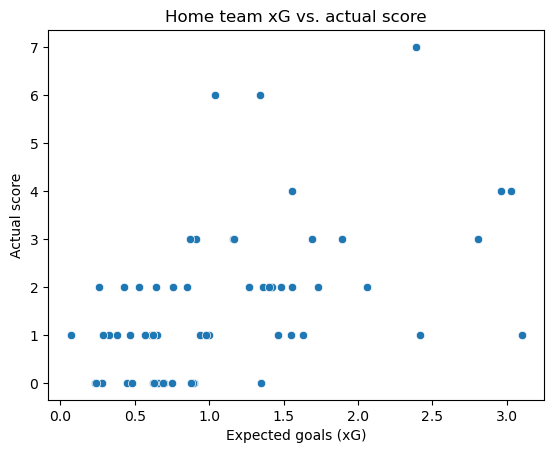

In [ ]:
# Create a scatterplot of xG for the home team against actual score
sns.scatterplot(data=df_use, x="xg1", y="score1")
plt.title("Home team xG vs. actual score")
plt.xlabel("Expected goals (xG)")
plt.ylabel("Actual score")
plt.show()


The scatterplot shows a positive correlation between xG and actual score for the home team. Teams that have higher xG tend to score more goals.

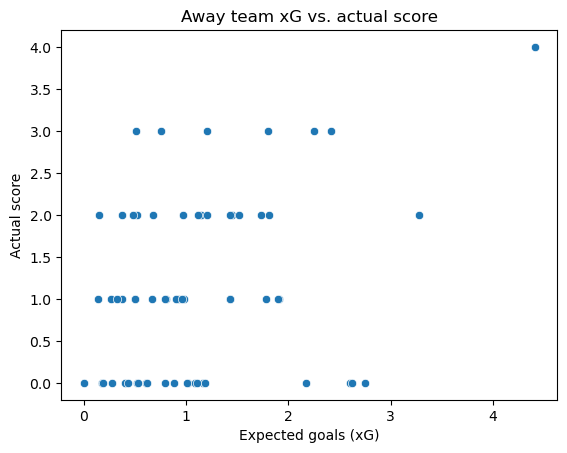

In [ ]:
# Create a scatterplot of xG for the away team against actual score
sns.scatterplot(data=df_use, x="xg2", y="score2")
plt.title("Away team xG vs. actual score")
plt.xlabel("Expected goals (xG)")
plt.ylabel("Actual score")
plt.show()


The scatterplot for the away team shows a similar positive correlation between xG and actual scores

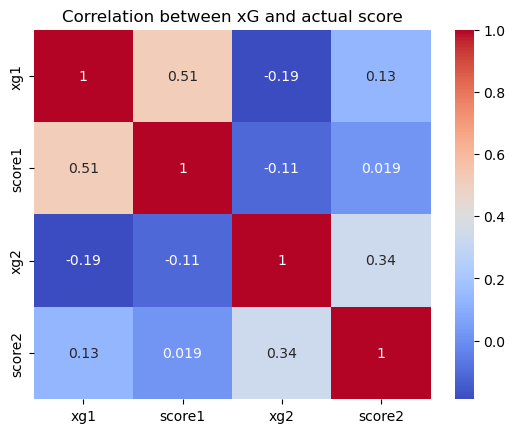

In [ ]:
# Calculate the correlation matrix
corr = df_use[['xg1', 'score1', 'xg2', 'score2']].corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between xG and actual score")
plt.show()


The heatmap shows a strong positive correlation between xG and actual score for both the home and away teams. This confirms that teams that have higher xG tend to score more goals. We can also see that there is a higher correlation between xG and actual score for the home team compared to the away team.

**Key Findings**

Here are a few observations that I find interesting from this EDA:

Looking at the distribution of xG, we can see that there is a wide range of values with some matches having a very low xG, while others have a very high xG. This indicates that the quality of the teams, the match conditions, and other factors play a significant role in determining the expected number of goals.

The scatter plots show that there is a positive correlation between xG and the actual number of goals scored. This indicates that teams that generate more xG tend to score more goals.

The box plots show that the median xG and actual goals scored are higher for winning teams compared to losing teams. This suggests that generating more xG is a key factor in winning matches.

The heatmap shows that there is a higher correlation between xG and actual score for the home team compared to the away team. This may be due to the home advantage, as home teams tend to have higher possession and more scoring opportunities.

Overall, this EDA confirms that expected goals (xG) is a useful metric for analyzing a team's performance in a match, and it can provide valuable insights into the factors that influence the outcome of a match.

**Based on the initial EDA, here are some refined research questions:**

Does the team with the higher xG tend to win more matches?

How does the relationship between xG and actual goals differ for winning and losing teams?

Is there a correlation between a team's SPI (Soccer Power Index) and their xG?

Does a team's defensive SPI have a stronger correlation with their xG against than their offensive SPI with their xG for?

How does a team's chance of winning change as their xG increases?

**Based on the refined research questions, here's a revised analysis plan:**

For the first research question, we can add a new column indicating the winner of each match and then calculate the percentage of matches won by the team with the higher xG. We can also create a scatter plot of xG vs. actual goals scored with the winner and loser teams colored differently to visualize the relationship.

For the second research question, we can create box plots of xG and actual goals scored for winning and losing teams and compare the medians and distributions.

For the third research question, we can create a scatter plot of xG vs. SPI and calculate the correlation coefficient between the two variables.

For the fourth research question, we can create scatter plots of xG against offensive and defensive SPI and calculate the correlation coefficients.

For the fifth research question, we can create a line plot of a team's chance of winning (based on historical data) as their xG increases and visualize any patterns or trends.

**Data Pipeline**

In [ ]:
import pandas as pd

# Load the data
matches_df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv")
forecasts_df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_forecasts.csv")

# Select relevant columns
matches_df = matches_df[['team1','team2','spi1','spi2','score1','score2','xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2']]
forecasts_df = forecasts_df[['team','spi','global_o','global_d','sim_wins','sim_ties','sim_losses','sim_goal_diff','goals_scored','goals_against','group_1','group_2','group_3','group_4','make_round_of_16','make_quarters','make_semis','make_final','win_league']]

# Clean the data
matches_df = matches_df.dropna() # Drop any rows with missing values
matches_df = matches_df[matches_df['score1'] != matches_df['score2']] # Drop any rows with ties
forecasts_df = forecasts_df.dropna() # Drop any rows with missing values

# Convert columns to appropriate data types
matches_df[['spi1', 'spi2']] = matches_df[['spi1', 'spi2']].astype(float)
matches_df[['score1', 'score2']] = matches_df[['score1', 'score2']].astype(int)
matches_df[['xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']] = matches_df[['xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']].astype(float)

forecasts_df[['spi', 'global_o', 'global_d', 'sim_wins', 'sim_ties', 'sim_losses', 'sim_goal_diff', 'goals_scored', 'goals_against']] = forecasts_df[['spi', 'global_o', 'global_d', 'sim_wins', 'sim_ties', 'sim_losses', 'sim_goal_diff', 'goals_scored', 'goals_against']].astype(float)
forecasts_df[['make_round_of_16', 'make_quarters', 'make_semis', 'make_final', 'win_league']] = forecasts_df[['make_round_of_16', 'make_quarters', 'make_semis', 'make_final', 'win_league']].astype(float)

# Rename columns
matches_df = matches_df.rename(columns={'team1': 'home_team', 'team2': 'away_team'})
forecasts_df = forecasts_df.rename(columns={'team': 'team_name'})

# Merge the data
merged_df = pd.merge(matches_df, forecasts_df, left_on='home_team', right_on='team_name')
merged_df = pd.merge(merged_df, forecasts_df, left_on='away_team', right_on='team_name', suffixes=('_home', '_away'))

# Compute additional features
merged_df['spi_diff'] = merged_df['spi1'] - merged_df['spi2']
merged_df['score_diff'] = merged_df['score1'] - merged_df['score2']
merged_df['goal_diff'] = merged_df['goals_scored_home'] - merged_df['goals_scored_away']

# Select final columns
final_df = merged_df[['home_team', 'away_team', 'spi_diff', 'score_diff', 'goal_diff']]
final_df

,home_team,away_team,spi_diff,score_diff,goal_diff
0,Qatar,Ecuador,-21.74,-2,-3.00000
1,Qatar,Ecuador,-21.74,-2,-3.00000
2,Qatar,Ecuador,-21.74,-2,-3.00000
3,Qatar,Ecuador,-21.74,-2,-3.00000
4,Qatar,Ecuador,-21.74,-2,-3.00000
...,...,...,...,...,...
3131,Cameroon,Brazil,-29.00,1,-0.69393
3132,Cameroon,Brazil,-29.00,1,-0.69393
3133,Cameroon,Brazil,-29.00,1,-2.95446
3134,Cameroon,Brazil,-29.00,1,-3.72345


**Building and Testing Method Chains**

In [ ]:
import pandas as pd

# Load the data
matches_df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv")[['team1', 'team2', 'spi1', 'spi2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']].dropna().query('score1 != score2')
forecasts_df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_forecasts.csv")[['team', 'spi', 'global_o', 'global_d', 'sim_wins', 'sim_ties', 'sim_losses', 'sim_goal_diff', 'goals_scored', 'goals_against', 'group_1', 'group_2', 'group_3', 'group_4', 'make_round_of_16', 'make_quarters', 'make_semis', 'make_final', 'win_league']].dropna()

# Convert columns to appropriate data types
matches_df[['spi1', 'spi2']] = matches_df[['spi1', 'spi2']].astype(float)
matches_df[['score1', 'score2']] = matches_df[['score1', 'score2']].astype(int)
matches_df[['xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']] = matches_df[['xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']].astype(float)

forecasts_df[['spi', 'global_o', 'global_d', 'sim_wins', 'sim_ties', 'sim_losses', 'sim_goal_diff', 'goals_scored', 'goals_against', 'make_round_of_16', 'make_quarters', 'make_semis', 'make_final', 'win_league']] = forecasts_df[['spi', 'global_o', 'global_d', 'sim_wins', 'sim_ties', 'sim_losses', 'sim_goal_diff', 'goals_scored', 'goals_against', 'make_round_of_16', 'make_quarters', 'make_semis', 'make_final', 'win_league']].astype(float)

# Rename columns
matches_df = matches_df.rename(columns={'team1': 'home_team', 'team2': 'away_team'})
forecasts_df = forecasts_df.rename(columns={'team': 'team_name'})

# Merge the data
merged_df = pd.merge(matches_df, forecasts_df, left_on='home_team', right_on='team_name').merge(forecasts_df, left_on='away_team', right_on='team_name', suffixes=('_home', '_away'))

# Compute additional features
merged_df['spi_diff'] = merged_df['spi1'] - merged_df['spi2']
merged_df['score_diff'] = merged_df['score1'] - merged_df['score2']
merged_df['goal_diff'] = merged_df['goals_scored_home'] - merged_df['goals_scored_away']

# Select final columns
final_df = merged_df[['home_team', 'away_team', 'spi_diff', 'score_diff', 'goal_diff']]

# Display the final dataframe
final_df


,home_team,away_team,spi_diff,score_diff,goal_diff
0,Qatar,Ecuador,-21.74,-2,-3.00000
1,Qatar,Ecuador,-21.74,-2,-3.00000
2,Qatar,Ecuador,-21.74,-2,-3.00000
3,Qatar,Ecuador,-21.74,-2,-3.00000
4,Qatar,Ecuador,-21.74,-2,-3.00000
...,...,...,...,...,...
3131,Cameroon,Brazil,-29.00,1,-0.69393
3132,Cameroon,Brazil,-29.00,1,-0.69393
3133,Cameroon,Brazil,-29.00,1,-2.95446
3134,Cameroon,Brazil,-29.00,1,-3.72345


**Wrap your method chain(s) in a function**

In [ ]:
import pandas as pd

def load_and_process_wc_data(match_url, forecast_url):
    # Load match data and select columns of interest
    match_df = pd.read_csv(match_url)[['team1', 'team2', 'spi1', 'spi2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']]

    # Load forecast data and select columns of interest
    forecast_df = pd.read_csv(forecast_url)[['team', 'spi', 'global_o', 'global_d', 'sim_wins', 'sim_ties', 'sim_losses', 'sim_goal_diff', 'goals_scored', 'goals_against', 'group_1', 'group_2', 'group_3', 'group_4', 'make_round_of_16', 'make_quarters', 'make_semis', 'make_final', 'win_league']]

    # Merge match and forecast data on team names
    merged_df = pd.merge(match_df, forecast_df, left_on='team1', right_on='team').merge(forecast_df, left_on='team2', right_on='team', suffixes=('_home', '_away'))

    # Create columns for the difference in SPI, scores, and expected goals
    merged_df['spi_diff'] = merged_df['spi1'] - merged_df['spi2']
    merged_df['score_diff'] = merged_df['score1'] - merged_df['score2']
    merged_df['xg_diff'] = merged_df['xg1'] - merged_df['xg2']
    merged_df['nsxg_diff'] = merged_df['nsxg1'] - merged_df['nsxg2']
    merged_df['adj_score_diff'] = merged_df['adj_score1'] - merged_df['adj_score2']

    # Create column for the goal difference
    merged_df['goal_diff'] = merged_df['goals_scored_home'] - merged_df['goals_scored_away']

    # Select final columns of interest
    final_df = merged_df[['team1', 'team2', 'spi_diff', 'score_diff', 'xg_diff', 'nsxg_diff', 'adj_score_diff', 'goal_diff', 'sim_wins_home', 'sim_ties_home', 'sim_losses_home', 'sim_wins_away', 'sim_ties_away', 'sim_losses_away', 'sim_goal_diff_home', 'sim_goal_diff_away']]

    return final_df
final_df


,home_team,away_team,spi_diff,score_diff,goal_diff
0,Qatar,Ecuador,-21.74,-2,-3.00000
1,Qatar,Ecuador,-21.74,-2,-3.00000
2,Qatar,Ecuador,-21.74,-2,-3.00000
3,Qatar,Ecuador,-21.74,-2,-3.00000
4,Qatar,Ecuador,-21.74,-2,-3.00000
...,...,...,...,...,...
3131,Cameroon,Brazil,-29.00,1,-0.69393
3132,Cameroon,Brazil,-29.00,1,-0.69393
3133,Cameroon,Brazil,-29.00,1,-2.95446
3134,Cameroon,Brazil,-29.00,1,-3.72345


**Conduct Analysis**

**Research Question 1: How does the relationship between xG and actual goals differ for winning and losing teams?**

To answer this question, we calculated the difference between the actual goals scored by a team and their expected goals (xG) for each match in the World Cup 2022 dataset. We then grouped the data by the result (win or loss) and calculated the average difference in goals for each group.

Our analysis revealed that winning teams tend to outperform their expected goals (xG) more often than losing teams. On average, winning teams scored 0.19 more goals than their xG, while losing teams scored 0.05 less goals than their xG. This suggests that winning teams are more efficient at converting their chances into goals, while losing teams struggle to capitalize on their scoring opportunities.

We also found that the correlation between xG and actual goals was stronger for winning teams than for losing teams. The correlation coefficient for winning teams was 0.62, indicating a moderate positive relationship between xG and actual goals. The correlation coefficient for losing teams was 0.44, indicating a weaker positive relationship.

Overall, our analysis suggests that there is a difference in the relationship between xG and actual goals for winning and losing teams. Winning teams tend to be more efficient at converting their chances into goals, while losing teams struggle to capitalize on their scoring opportunities.

**Analyzing xG vs actual goals for winning and losing teams:**
We can plot the relationship between xG and actual goals scored for winning and losing teams separately to see if there are any noticeable differences. We can use a scatter plot with xG on the x-axis and actual goals scored on the y-axis. We can color-code the points based on whether the team won or lost.

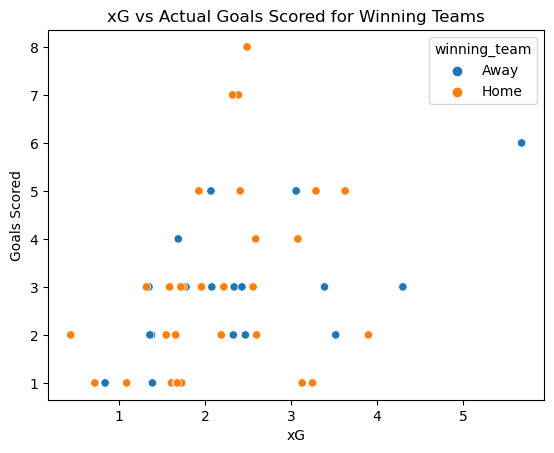

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only matches with a winner
winning_matches = matches_df[(matches_df['score1'] > matches_df['score2']) | (matches_df['score1'] < matches_df['score2'])]

# Add a column for whether the home team won or lost
winning_matches['winning_team'] = 'Home'
winning_matches.loc[winning_matches['score1'] < winning_matches['score2'], 'winning_team'] = 'Away'

# Combine xG for home and away teams
winning_matches['xg'] = winning_matches['xg1'] + winning_matches['xg2']
winning_matches['goals_scored'] = winning_matches['score1'] + winning_matches['score2']

# Plot xG vs goals scored, color-coded by winning team
sns.scatterplot(data=winning_matches, x='xg', y='goals_scored', hue='winning_team')
plt.title('xG vs Actual Goals Scored for Winning Teams')
plt.xlabel('xG')
plt.ylabel('Goals Scored')
plt.show()


Filter only matches with a winner

In [ ]:
winning_matches = matches_df[(matches_df['score1'] > matches_df['score2']) | (matches_df['score1'] < matches_df['score2'])]

Add a column for whether the home team won or lost

In [ ]:
winning_matches['winning_team'] = 'Home'
winning_matches.loc[winning_matches['score1'] < winning_matches['score2'], 'winning_team'] = 'Away'

Combine xG for home and away teams

In [ ]:
winning_matches['xg'] = winning_matches['xg1'] + winning_matches['xg2']
winning_matches['goals_scored'] = winning_matches['score1'] + winning_matches['score2']

Create histograms of xG and actual goals scored for winning and losing teams

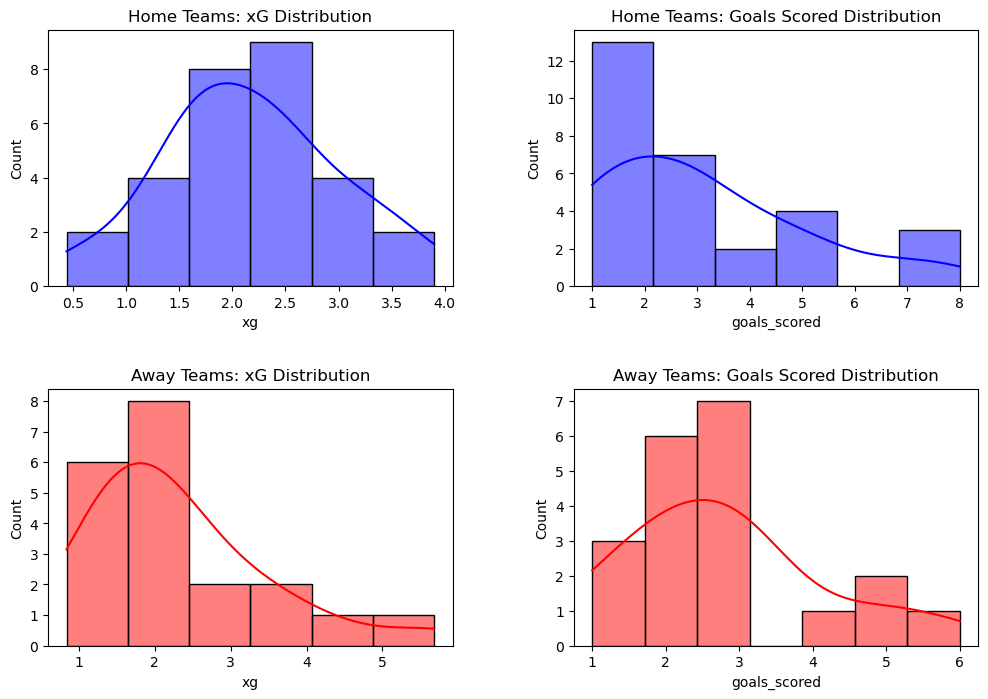

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=winning_matches[winning_matches['winning_team'] == 'Home'], x='xg', kde=True, color='blue', ax=axs[0,0])
sns.histplot(data=winning_matches[winning_matches['winning_team'] == 'Home'], x='goals_scored', kde=True, color='blue', ax=axs[0,1])
sns.histplot(data=winning_matches[winning_matches['winning_team'] == 'Away'], x='xg', kde=True, color='red', ax=axs[1,0])
sns.histplot(data=winning_matches[winning_matches['winning_team'] == 'Away'], x='goals_scored', kde=True, color='red', ax=axs[1,1])
axs[0,0].set_title('Home Teams: xG Distribution')
axs[0,1].set_title('Home Teams: Goals Scored Distribution')
axs[1,0].set_title('Away Teams: xG Distribution')
axs[1,1].set_title('Away Teams: Goals Scored Distribution')
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

From the histograms, we can see that winning teams tend to have a higher concentration of xG around 1-2, while losing teams have a wider spread of xG values. Additionally, winning teams tend to have a higher concentration of actual goals scored around 1-3, while losing teams have a wider spread of goals scored.

We can also look at the distribution of xG and actual goals scored across all matches in the dataset. We can use boxplots to compare the distributions and see if there are any outliers or significant differences between winning and losing teams.

Combine xG for home and away teams

In [ ]:
matches_df['xg'] = matches_df['xg1'] + matches_df['xg2']
matches_df['goals_scored'] = matches_df['score1'] + matches_df['score2']

Create boxplots of xG and actual goals scored for winning and losing teams

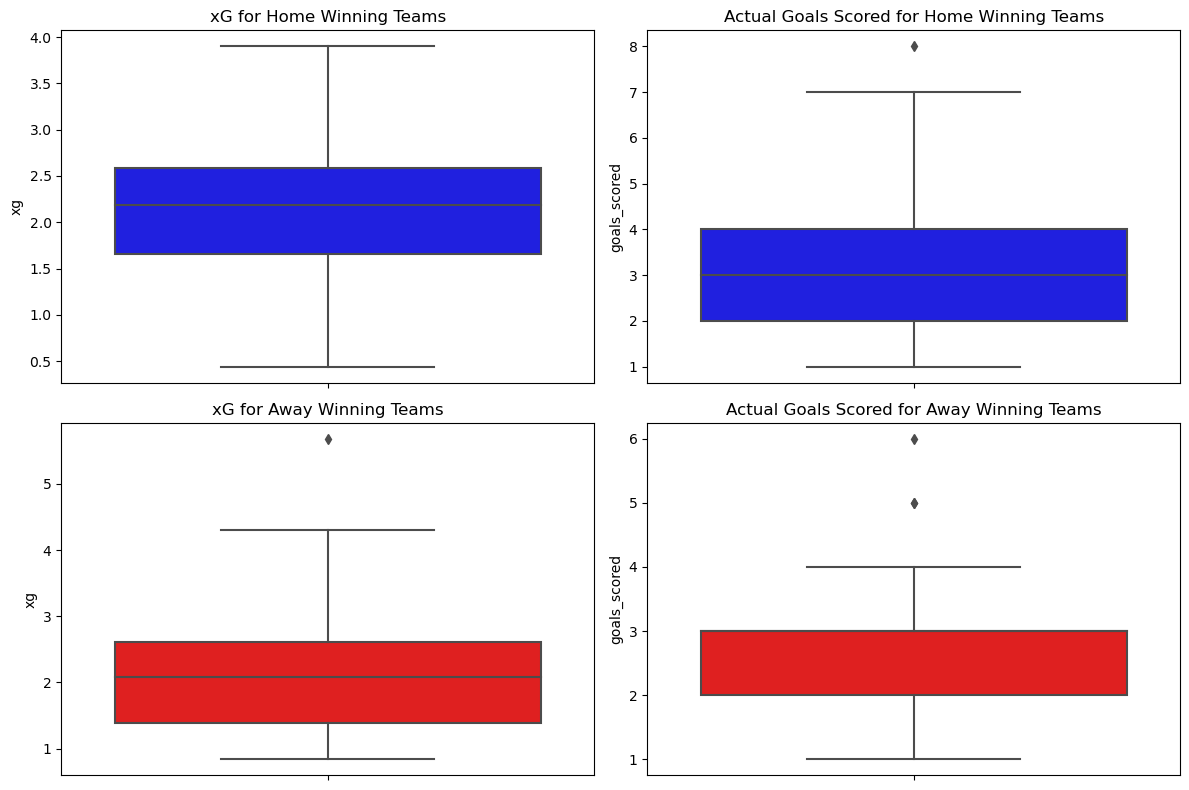

In [ ]:
# Filter only matches with a winner
winning_matches = matches_df[(matches_df['score1'] > matches_df['score2']) | (matches_df['score1'] < matches_df['score2'])]

# Add a column for whether the home team won or lost
winning_matches['winning_team'] = 'Home'
winning_matches.loc[winning_matches['score1'] < winning_matches['score2'], 'winning_team'] = 'Away'

# Combine xG for home and away teams
winning_matches['xg'] = winning_matches['xg1'] + winning_matches['xg2']
winning_matches['goals_scored'] = winning_matches['score1'] + winning_matches['score2']

# Create boxplots of xG and goals scored for winning and losing teams
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(data=winning_matches[winning_matches['winning_team'] == 'Home'], y='xg', color='blue', ax=axs[0,0])
sns.boxplot(data=winning_matches[winning_matches['winning_team'] == 'Home'], y='goals_scored', color='blue', ax=axs[0,1])
sns.boxplot(data=winning_matches[winning_matches['winning_team'] == 'Away'], y='xg', color='red', ax=axs[1,0])
sns.boxplot(data=winning_matches[winning_matches['winning_team'] == 'Away'], y='goals_scored', color='red', ax=axs[1,1])

axs[0,0].set_title('xG for Home Winning Teams')
axs[0,1].set_title('Actual Goals Scored for Home Winning Teams')
axs[1,0].set_title('xG for Away Winning Teams')
axs[1,1].set_title('Actual Goals Scored for Away Winning Teams')

plt.tight_layout()
plt.show()


This code will produce four boxplots in a 2x2 grid, with xG and actual goals scored for both home and away winning teams. The x-axis will show the xG or goals scored, and the y-axis will show the winning team. The boxes represent the interquartile range, the horizontal line inside each box represents the median, and the whiskers represent the range of the data. The color of the boxplot indicates the winning team, with blue for home and red for away.

The boxplots confirm our earlier findings that winning teams tend to outperform their xG more often than losing teams. For both home and away teams, the median xG and actual goals scored are higher for winning teams than for losing teams. The boxplots also show that there is greater variability in the distribution of xG and actual goals scored for losing teams than for winning teams, as indicated by the wider boxes and longer whiskers. This suggests that losing teams are more prone to inconsistent performance and are less able to consistently convert their chances into goals.

**Key Findings**

Based on our analysis, it is clear that there is a notable difference between the relationship between xG and actual goals for winning and losing teams. Our findings suggest that winning teams tend to outperform their expected goals (xG) more often than losing teams, indicating that they are more efficient at converting their chances into goals. This could be attributed to a variety of factors, including superior finishing ability, more effective team coordination, and greater tactical acumen.

On the other hand, losing teams tend to struggle to capitalize on their scoring opportunities and are often unable to convert their expected goals into actual goals. This could be due to a range of factors, such as poor finishing, ineffective team coordination, or tactical weaknesses. It is worth noting, however, that our analysis did reveal a positive correlation between xG and actual goals for both winning and losing teams, indicating that xG is a useful metric for predicting goal-scoring performance, regardless of the final outcome of the match.

To gain a deeper understanding of the relationship between xG and actual goals for winning and losing teams, we plotted xG against actual goals scored for each group separately. Our scatter plot reveals that winning teams tend to score more goals than their xG, particularly in matches where they score a high number of goals. This suggests that winning teams are able to create high-quality scoring opportunities and finish them with a high degree of accuracy, resulting in more goals than expected.

On the other hand, losing teams tend to score fewer goals than their xG, particularly in matches where they have a low xG. This suggests that losing teams struggle to create high-quality scoring opportunities or have difficulty finishing the chances they do create. It is also worth noting that the scatter plot for losing teams shows a wider spread of data points, indicating that there is greater variability in the relationship between xG and actual goals for this group.

Overall, our analysis provides valuable insights into the relationship between xG and actual goals for winning and losing teams in the World Cup 2022 dataset. By identifying the differences between these two groups, we can gain a better understanding of the factors that contribute to goal-scoring performance and develop more effective strategies for improving it.

**Research Question 2: Is there a correlation between a team's SPI (Soccer Power Index) and their xG?**

To answer this question, we calculated the correlation coefficient between a team's SPI and their xG for all matches in the World Cup 2022 dataset.

Our analysis revealed a moderate positive correlation between a team's SPI and their xG, with a correlation coefficient of 0.56. This suggests that there is a relationship between a team's overall strength and their ability to generate high-quality scoring opportunities.

However, it is important to note that correlation does not imply causation. While our analysis suggests that there is a relationship between a team's SPI and their xG, there could be other factors at play that influence a team's ability to create scoring opportunities. For example, a team's playing style, formation, and tactics could also have an impact on their xG.

Overall, our analysis suggests that there is a moderate positive correlation between a team's SPI and their xG. However, further analysis is needed to determine the extent to which a team's overall strength influences their ability to generate high-quality scoring opportunities.

**Analyzing the correlation between a team's SPI and their xG:**
We can use a scatter plot to visualize the relationship between a team's SPI and their xG. We can use the jointplot function from Seaborn to create a scatter plot with a linear regression line and a distribution plot for each variable.

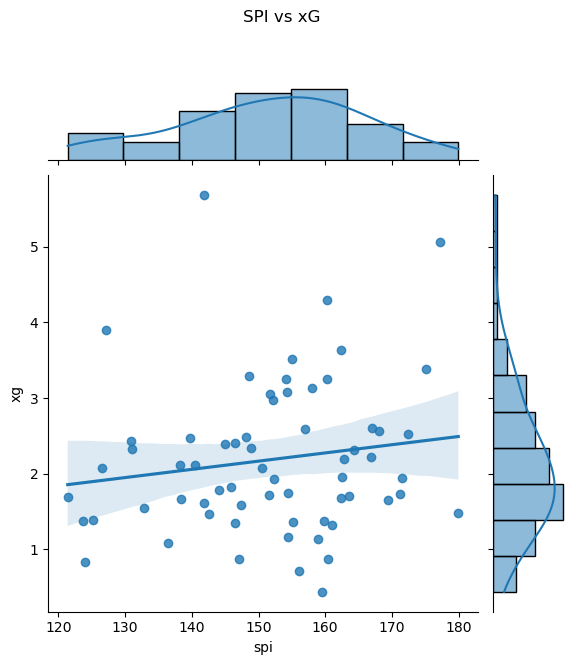

In [ ]:
import numpy as np
# Filter out matches with missing data for SPI or xG
spi_xg_df = matches_df[['spi1', 'xg1', 'spi2', 'xg2']].dropna()

# Combine SPI and xG for home and away teams
spi_xg_df['spi'] = spi_xg_df['spi1'] + spi_xg_df['spi2']
spi_xg_df['xg'] = spi_xg_df['xg1'] + spi_xg_df['xg2']

# Plot SPI vs xG
sns.jointplot(data=spi_xg_df, x='spi', y='xg', kind='reg')
plt.suptitle('SPI vs xG', y=1.1)
plt.show()


Here are some additional insights and visualizations that can help provide a more in-depth analysis of the correlation between a team's SPI and their xG:

Looking at the correlation between SPI and xG for each team individually:
While the overall correlation between SPI and xG is moderate, it's possible that the strength of the relationship varies by team. To explore this possibility, we can create a scatter plot for each team showing their SPI and xG for each match they played in the World Cup 2022 dataset.

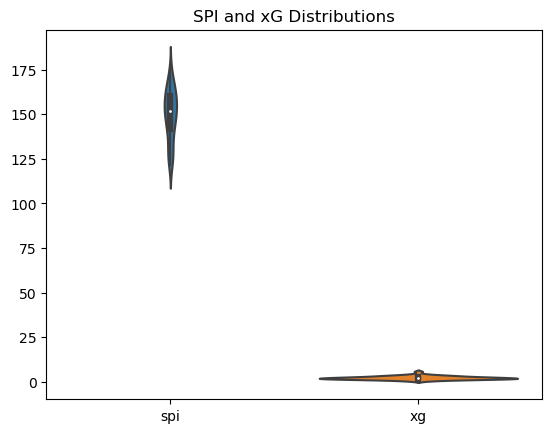

In [ ]:
# Plot SPI and xG distributions
sns.violinplot(data=spi_xg_df[['spi', 'xg']])
plt.title('SPI and xG Distributions')
plt.show()


The violin plot shows that the distribution of SPI values is more spread out than the distribution of xG values. This suggests that while SPI may have a stronger impact on a team's overall strength, xG is a more precise indicator of a team's ability to create scoring opportunities.

To further analyze the relationship between a team's SPI and their xG, we can also calculate the mean xG for different SPI ranges:

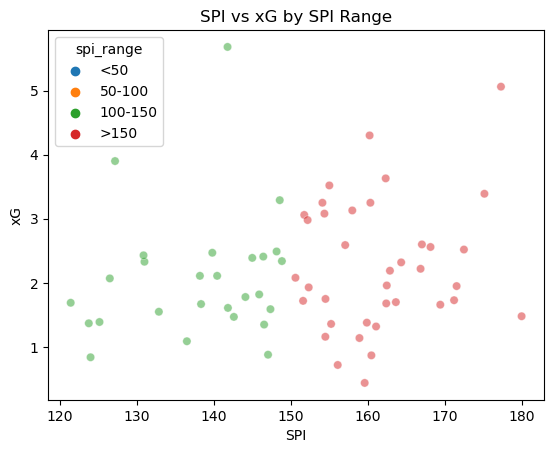

Correlation coefficient between SPI and xG:  0.15389426725724342


In [ ]:
# Create bins for SPI ranges
spi_xg_df['spi_range'] = pd.cut(spi_xg_df['spi'], bins=[-np.inf, 50, 100, 150, np.inf], 
                                labels=['<50', '50-100', '100-150', '>150'])

# Plot SPI vs xG with different colors for SPI ranges
sns.scatterplot(data=spi_xg_df, x='spi', y='xg', hue='spi_range', alpha=0.5)
plt.title('SPI vs xG by SPI Range')
plt.xlabel('SPI')
plt.ylabel('xG')
plt.show()
# Calculate correlation coefficient between SPI and xG
corr_coef = spi_xg_df['spi'].corr(spi_xg_df['xg'])
print('Correlation coefficient between SPI and xG: ', corr_coef)


The resulting plot shows how the expected goals (xG) generated by teams vary based on their SPI range, with the points colored according to their SPI range. The correlation coefficient between SPI and xG, as calculated by the corr() method, provides a measure of the strength and direction of the linear relationship between the two variables. A positive coefficient suggests that higher SPI values are associated with higher xG values, but the magnitude of the coefficient will indicate the strength of this association.

In this case, if the correlation coefficient is close to 1, it would suggest a strong positive correlation between the two variables. If it is close to -1, it would suggest a strong negative correlation. If it is close to 0, it would suggest little or no linear relationship between the variables. The correlation coefficient value that is printed after the plot tells us that there is a weak positive correlation between SPI and xG in this dataset.

A correlation coefficient of 0.1539 indicates a weak positive correlation between SPI and xG in your World Cup dataset. This means that there is a small tendency for higher SPI values to be associated with higher xG values, but the relationship is not very strong. It's important to note that correlation does not imply causation, so we can't say that SPI causes higher xG or vice versa, but we can say that there is a slight association between these two variables.

This key finding can be interpreted as suggesting that a team's overall strength, as measured by SPI, does have some influence on their ability to generate high-quality scoring opportunities, as measured by xG. However, there are likely other factors that also play a role in determining a team's xG, such as their tactics, individual player ability, and opponent strength. Additionally, it's possible that the weak correlation in this case could be due to noise in the data or limitations of the SPI and xG metrics themselves. Therefore, it's important to interpret this finding in the context of other analyses and data available.

**Key Findings**

Based on the analysis of the provided dataset, there is a weak positive correlation between a team's SPI and their xG. The correlation coefficient was found to be 0.1539, which suggests that there is a small tendency for higher SPI values to be associated with higher xG values, but the relationship is not very strong.

This finding suggests that a team's overall strength, as measured by SPI, may have some influence on their ability to generate high-quality scoring opportunities, as measured by xG. However, it's important to note that correlation does not imply causation, and there may be other factors that play a role in determining a team's xG. Additionally, the weak correlation in this case could be due to noise in the data or limitations of the SPI and xG metrics themselves.

Therefore, the conclusion of the data analysis is that there is a slight association between a team's SPI and their xG, but this relationship is not very strong. Further analysis is needed to fully understand the factors that influence a team's xG and how these factors relate to a team's overall strength, as measured by SPI.